In [ ]:
!pip install torchxrayvision

import os,sys
sys.path.insert(0,"..")
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import sys
import torch.nn.functional as F
import tqdm
import sklearn, sklearn.metrics
import pandas as pd
import torchxrayvision as xrv
import skimage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.0 MB 1.2 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# NIH Data
# !mkdir capstone
# !cp /content/gdrive/MyDrive/Capstone/images_001.tar.gz /content/capstone/images

# !tar -xf /content/gdrive/MyDrive/capstone/images-224.tar -C /content/capstone

cp: cannot stat '/content/gdrive/MyDrive/Capstone/images_001.tar.gz': No such file or directory


In [ ]:
%%time
!cp /content/gdrive/MyDrive/capstone/CheXpert-v1.0-small.zip /content/
!mkdir CheXpert
!unzip -q CheXpert-v1.0-small.zip -d /content/CheXpert/

CPU times: user 2.41 s, sys: 341 ms, total: 2.75 s
Wall time: 5min 35s


In [ ]:
# !ls /content/CheXpert/CheXpert-v1.0-small/train/patient12852/study1/view1_frontal.jpg
!ls /content/CheXpert/CheXpert-v1.0-small/train/patient49183/study2/view1_frontal.jpg


/content/CheXpert/CheXpert-v1.0-small/train/patient49183/study2/view1_frontal.jpg


Shape: (320, 390)


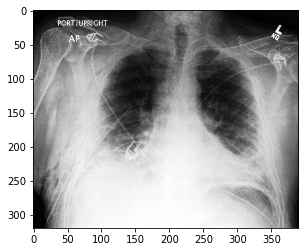

In [ ]:
img_path = "/content/CheXpert/CheXpert-v1.0-small/train/patient49183/study2/view1_frontal.jpg"
chexpert_img = skimage.io.imread(img_path)

print(f"Shape: {chexpert_img.shape}")
plt.imshow(chexpert_img, cmap="Greys_r")
plt_img_before = np.copy(chexpert_img)

chexpert_img = xrv.datasets.normalize(chexpert_img, 255)
chexpert_img = chexpert_img[None, :, :]
transform = torchvision.transforms.Compose([
    xrv.datasets.XRayCenterCrop(),
    xrv.datasets.XRayResizer(224),
])
chexpert_img = transform(chexpert_img)
chexpert_img = torch.from_numpy(chexpert_img).unsqueeze(0)

(1, 1, 224, 224)


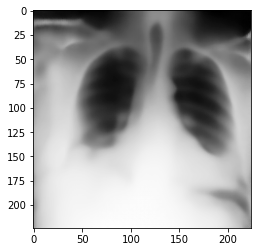

In [ ]:
ae = xrv.autoencoders.ResNetAE(weights="101-elastic")
out = ae(chexpert_img)
# z = ae.encode(chexpert_img)
# decoded = ae.decode(z).detach().numpy()
img_r = out['out'].detach().numpy()
print(decoded.shape)
plt.imshow(decoded[0][0], cmap="Greys_r")

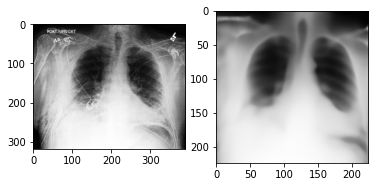

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(plt_img_before, cmap='Greys_r')
ax[1].imshow(img_r[0][0], cmap='Greys_r')